In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#设置显存大小，动态使用显存
physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [30]:
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"

In [3]:
fash_data = keras.datasets.fashion_mnist
(train_img,train_lab),(test_img,test_lab) = fash_data.load_data()

In [4]:
train_img.shape

(60000, 28, 28)

In [5]:
#trian_img = np.expand_dims(train_img,-1)
train_img = np.expand_dims(train_img,-1)
test_img = np.expand_dims(test_img,-1)

In [6]:
train_img.shape

(60000, 28, 28, 1)

In [7]:
train_img.shape[1:]

(28, 28, 1)

In [21]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),
                                input_shape=train_img.shape[1:],
                                activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)        

In [10]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['acc'])

In [11]:
history = model.fit(train_img,train_lab,epochs=30,validation_data=(test_img,test_lab))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 91us/sample - loss: 0.7948 - acc: 0.7421 - val_loss: 0.5408 - val_acc: 0.8154
Epoch 2/30
60000/60000 [==============================] - 5s 80us/sample - loss: 0.4897 - acc: 0.8295 - val_loss: 0.4601 - val_acc: 0.8448
Epoch 3/30
60000/60000 [==============================] - 7s 111us/sample - loss: 0.4317 - acc: 0.8500 - val_loss: 0.4326 - val_acc: 0.8508
Epoch 4/30
60000/60000 [==============================] - 6s 102us/sample - loss: 0.3937 - acc: 0.8608 - val_loss: 0.4160 - val_acc: 0.8514
Epoch 5/30
60000/60000 [==============================] - 4s 62us/sample - loss: 0.3659 - acc: 0.8716 - val_loss: 0.3912 - val_acc: 0.8636
Epoch 6/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3453 - acc: 0.8786 - val_loss: 0.4106 - val_acc: 0.8534
Epoch 7/30
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3300 - acc: 0.8842 - val_loss: 

In [12]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

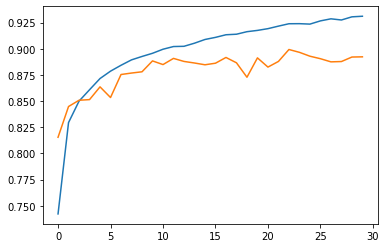

In [14]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')

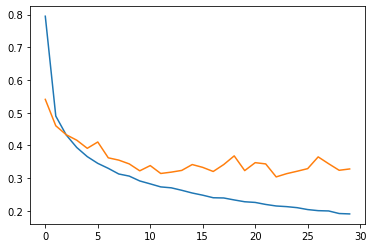

In [15]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')

In [23]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),
                                input_shape=train_img.shape[1:],
                                activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.MaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(512,(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [24]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['acc'])

In [25]:
history = model.fit(train_img,train_lab,epochs=30,validation_data=(test_img,test_lab))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 19s 317us/sample - loss: 0.8258 - acc: 0.6877 - val_loss: 0.4752 - val_acc: 0.8258
Epoch 2/30
60000/60000 [==============================] - 19s 309us/sample - loss: 0.4778 - acc: 0.8246 - val_loss: 0.3988 - val_acc: 0.8529
Epoch 3/30
60000/60000 [==============================] - 18s 306us/sample - loss: 0.4203 - acc: 0.8451 - val_loss: 0.3517 - val_acc: 0.8639
Epoch 4/30
60000/60000 [==============================] - 18s 302us/sample - loss: 0.3870 - acc: 0.8582 - val_loss: 0.3764 - val_acc: 0.8646
Epoch 5/30
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3636 - acc: 0.8691 - val_loss: 0.3174 - val_acc: 0.8849
Epoch 6/30
60000/60000 [==============================] - 18s 301us/sample - loss: 0.3502 - acc: 0.8730 - val_loss: 0.3168 - val_acc: 0.8864
Epoch 7/30
60000/60000 [==============================] - 18s 305us/sample - loss: 0.3435 - acc: 0.8793 

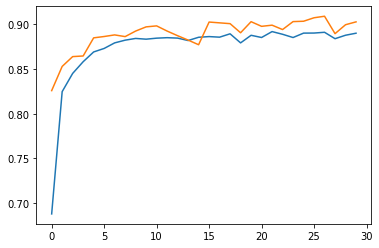

In [26]:
history.history.keys()
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')

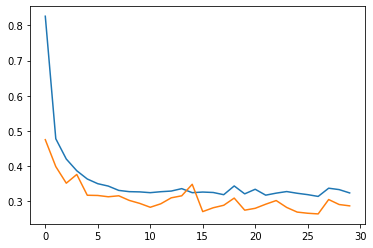

In [27]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')